In [6]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

# api key
from dotenv import load_dotenv
load_dotenv()


True

In [2]:
import logging
from app.config import setup_logging

# 로깅 설정
logger = setup_logging()


# 로깅 설정
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

# 프로젝트 이름을 입력합니다.
logger.info("CH17-LANGGRAPH")


INFO:__main__:CH17-LANGGRAPH


In [3]:
from app.server import get_context
from langgraph.graph import END, StateGraph
from langgraph.checkpoint.memory import MemorySaver
from app.core import AgentState


# langgraph.graph에서 StateGraph와 END를 가져옵니다.
workflow = StateGraph(AgentState)

# 노드들을 정의합니다.
workflow.add_node("get_context", get_context) 


# 조건부 엣지를 추가합니다.
# workflow.add_conditional_edges(
#     "relevance_check",  # 관련성 체크 노드에서 나온 결과를 is_relevant 함수에 전달합니다.
#     is_relevant,
#     {
#         "관련성 O": END,  # 관련성이 있으면 종료합니다.
#         "관련성 X": "retrieve",  # 관련성이 없으면 다시 답변을 생성합니다.
#         "확인불가": "retrieve",  # 관련성 체크 결과가 모호하다면 다시 답변을 생성합니다.
#     },
# )

# 시작점을 설정합니다.
workflow.set_entry_point("get_context")
workflow.set_finish_point("get_context")

# 기록을 위한 메모리 저장소를 설정합니다.
memory = MemorySaver()

# 그래프를 컴파일합니다.
graph = workflow.compile(checkpointer=memory)


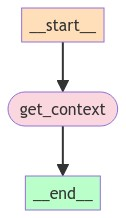

In [4]:
from IPython.display import Image, display

try:
    display(
        Image(graph.get_graph(xray=True).draw_mermaid_png())
    )  # 실행 가능한 객체의 그래프를 mermaid 형식의 PNG로 그려서 표시합니다. xray=True는 추가적인 세부 정보를 포함합니다.
except:
    # 이 부분은 추가적인 의존성이 필요하며 선택적으로 실행됩니다.
    pass

In [ ]:
# from app.core import ChatHistory

config = {"configurable": {"thread_id": "1"}}
chat_history = []

user_input = input("User: ")

print(f"Query type: {type(user_input)}")

# 사용자 입력을 chat_history에 추가
chat_history.append({"role": "human", "content": user_input})

# graph.stream에 필요한 키들을 포함
agent_state = {
    "messages": "",
    "chat_history": chat_history,
    "question": user_input,
    "context": "",
    "response": "",
}

for event in graph.stream(agent_state, config):
    for value in event.values():
        print("\n=====================================\n" + str(value))
        # assistant_response = value["messages"][-1].content
        # print("Assistant:", assistant_response)
        
        # # 어시스턴트의 응답을 chat_history에 추가
        # chat_history.append({"role": "assistant", "content": assistant_response})
        
        print("Assistant:", value["chat_history"][-1]["content"])
        print("Assistant:", value["context"])